# 導入資料

In [220]:
from sklearn import preprocessing 
from sklearn.model_selection import GridSearchCV 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import RandomForestRegressor

import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.mode.chained_assignment = None
%matplotlib inline

In [221]:
train = pd.read_csv("C:/Users/User/kaggle/Titanic Machine Learning from Disaster/train.csv")
test = pd.read_csv("C:/Users/User/kaggle/Titanic Machine Learning from Disaster/test.csv")
submit = pd.read_csv("C:/Users/User/kaggle/Titanic Machine Learning from Disaster/gender_submission.csv")

> train data 的Age, Cabin, Embarked有空值

In [222]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


> test data的 Age, Cabin, Fare  

In [223]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [224]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [225]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [226]:
data = pd.concat([train, test], axis = 0, sort = True).reset_index().drop(['index'],axis=1)
data

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236
1305,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758
1306,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262
1307,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309


# 資料分析

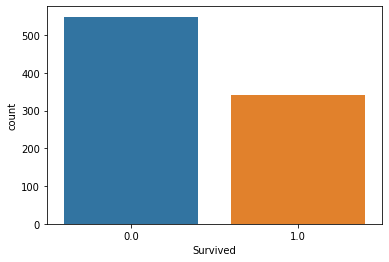

In [227]:
sns.countplot(data['Survived'])

> 1等艙的生存率最高，3等艙的生存率最低

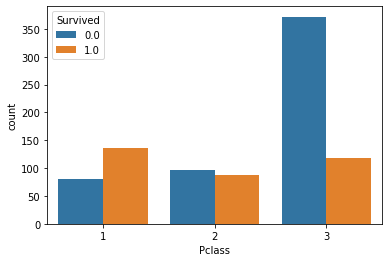

In [228]:
sns.countplot(data['Pclass'], hue= data['Survived'])

> 女生的生存率是高於男生的，可能是在逃難時優先讓女生或小孩先搭船

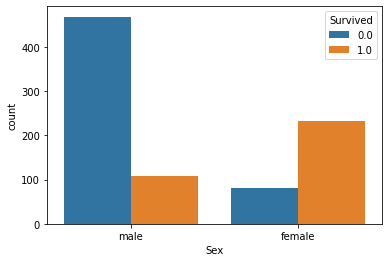

In [229]:
sns.countplot(data['Sex'], hue = data['Survived'])

> S港出發的人生存率較低

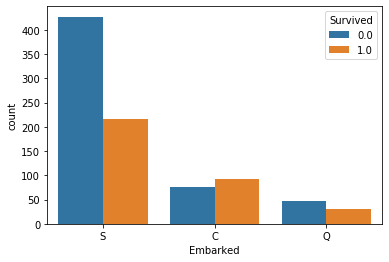

In [230]:
sns.countplot(data['Embarked'], hue=data['Survived'])

In [231]:
data.groupby(['Embarked'])['Fare'].mean()

Embarked
C    62.336267
Q    12.409012
S    27.418824
Name: Fare, dtype: float64

> 年齡小的存活比例高出許多

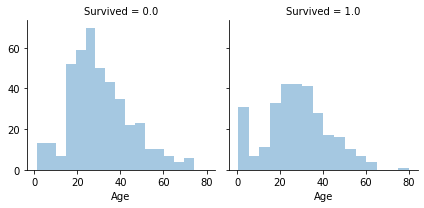

In [232]:
g = sns.FacetGrid(data, col='Survived')
g.map(sns.distplot, 'Age',kde=False)

> 票價越低死亡率越高

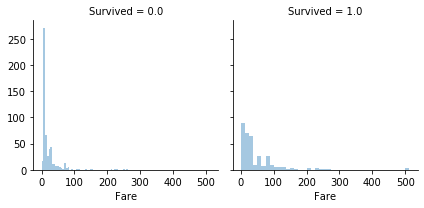

In [233]:
g = sns.FacetGrid(data, col='Survived')
g.map(sns.distplot, 'Fare',kde=False)

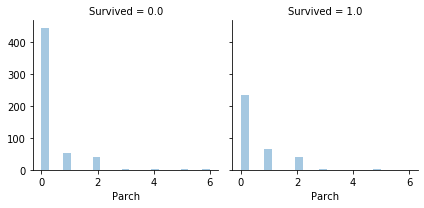

In [234]:
g= sns.FacetGrid(data, col='Survived')
g.map(sns.distplot, 'Parch',kde=False)

> 有攜伴參加的生存率比沒有攜伴參加的生存率高

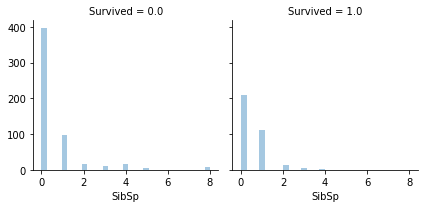

In [235]:
g = sns.FacetGrid(data, col='Survived')
g.map(sns.distplot, 'SibSp', kde=False)

> SibSp, Parch 整合成 Family_Size

In [236]:
data['Family_Size'] = data['Parch']+data['SibSp']

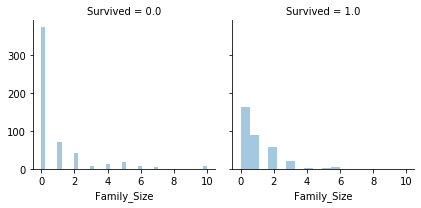

In [237]:
g = sns.FacetGrid(data, col='Survived')
g.map(sns.distplot, 'Family_Size', kde=False)

# 特徵工程

## Title

In [238]:
data['Title1'] = data['Name'].str.split(", ", expand=True)[1]     # 頓號後面要加空格 
data['Title1'] = data['Title1'].str.split(".",expand=True)[0]
data['Title1'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [239]:
pd.crosstab(data['Title1'],data['Sex']).T.style.background_gradient(cmap='summer_r')

Title1,Capt,Col,Don,Dona,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Sex,,,,,,,,,,,,,,,,,,
female,0,0,0,1,1,0,1,0,0,260,2,1,0,197,2,0,0,1
male,1,4,1,0,7,1,0,2,61,0,0,0,757,0,0,8,1,0


In [240]:
pd.crosstab(data['Title1'],data['Survived']).T.style.background_gradient(cmap='summer_r')

Title1,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Survived,,,,,,,,,,,,,,,,,
0.0,1,1,1,4,1,0,1,17,55,0,0,436,26,0,6,0,0
1.0,0,1,0,3,0,1,1,23,127,2,1,81,99,1,0,1,1


In [241]:
data.groupby(['Title1'])['Age'].mean()

Title1
Capt            70.000000
Col             54.000000
Don             40.000000
Dona            39.000000
Dr              43.571429
Jonkheer        38.000000
Lady            48.000000
Major           48.500000
Master           5.482642
Miss            21.774238
Mlle            24.000000
Mme             24.000000
Mr              32.252151
Mrs             36.994118
Ms              28.000000
Rev             41.250000
Sir             49.000000
the Countess    33.000000
Name: Age, dtype: float64

In [242]:
# 將稱謂比較少的乘客進行合併

data['Title2'] = data['Title1'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','the Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],
         ['Miss','Mrs','Miss','Mr','Mr','Mrs','Mrs','Mr','Mr','Mr','Mr','Mr','Mr','Mrs'])

In [243]:
data['Title2'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master'], dtype=object)

In [244]:
pd.crosstab(data['Title2'],data['Sex']).T.style.background_gradient(cmap='summer_r')

Title2,Master,Miss,Mr,Mrs
Sex,,,,
female,0,264,1,201
male,61,0,782,0


In [245]:
pd.crosstab(data['Title2'],data['Survived']).T.style.background_gradient(cmap='summer_r')

Title2,Master,Miss,Mr,Mrs
Survived,,,,
0.0,17,55,451,26
1.0,23,130,87,102


## Ticket
> 把票號的資訊取出前面英文的部分

In [246]:
# 將字串中的 '.','/' 用空格替代 ，再去除前後的空格 ，最後利用中間的空格來切割
# 判斷字串是否由數字組成，是由數字組成的用 'X' 取代
data['Ticket_info'] = data['Ticket'].apply(lambda x: x.replace(".", "").replace("/", "").strip().split(' ')[0]
                                           if not x.isdigit() else 'X')


## Embarked

In [247]:
# Embarked 只有少數遺漏，這邊使用眾數補值
data['Embarked'] = data['Embarked'].fillna('S')

## Fare

In [248]:
# Fare只缺少1筆，這邊用 mean()補值
data['Fare'] = data['Fare'].fillna(data['Fare'].mean())

## Cabin

In [249]:
data['Cabin'] = data['Cabin'].apply(lambda x: str(x)[0] if not pd.isnull(x) else 'Nocabin')
data['Cabin'].unique()

array(['Nocabin', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

##  將類別資料轉成整數

In [250]:
data['Sex'] = data['Sex'].astype('category').cat.codes
data['Embarked'] = data['Embarked'].astype('category').cat.codes
data['Pclass'] = data['Pclass'].astype('category').cat.codes
data['Title1'] = data['Title1'].astype('category').cat.codes
data['Title2'] = data['Title2'].astype('category').cat.codes
data['Cabin'] = data['Cabin'].astype('category').cat.codes
data['Ticket_info'] = data['Ticket_info'].astype('category').cat.codes

In [251]:
data

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Family_Size,Title1,Title2,Ticket_info
0,22.0,7,2,7.2500,"Braund, Mr. Owen Harris",0,1,2,1,1,0.0,A/5 21171,1,12,2,2
1,38.0,2,0,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,0,0,1,1.0,PC 17599,1,13,3,14
2,26.0,7,2,7.9250,"Heikkinen, Miss. Laina",0,3,2,0,0,1.0,STON/O2. 3101282,0,9,1,31
3,35.0,2,2,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,0,0,1,1.0,113803,1,13,3,36
4,35.0,7,2,8.0500,"Allen, Mr. William Henry",0,5,2,1,0,0.0,373450,0,12,2,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,7,2,8.0500,"Spector, Mr. Woolf",0,1305,2,1,0,NaN,A.5. 3236,0,12,2,2
1305,39.0,2,0,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,0,0,0,NaN,PC 17758,0,3,3,14
1306,38.5,7,2,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,2,1,0,NaN,SOTON/O.Q. 3101262,0,12,2,28
1307,NaN,7,2,8.0500,"Ware, Mr. Frederick",0,1308,2,1,0,NaN,359309,0,12,2,36


## AGE

In [252]:
# 利用 RandomforestRegressor 來推測年齡
dataAgeNull = data[data['Age'].isnull()]
dataAgeNotNull = data[data['Age'].notnull()]
remove_outlier = dataAgeNotNull[(np.abs(dataAgeNotNull['Fare'] - dataAgeNotNull['Fare'].mean()) > (4*dataAgeNotNull['Fare'].std()))|
                                (np.abs(dataAgeNotNull['Family_Size'] - dataAgeNotNull['Family_Size'].mean()) > (4*dataAgeNotNull['Family_Size'].std()))
                                  ]
rfModel_age = RandomForestRegressor(n_estimators=2000, random_state=42)
ageColumns = ['Embarked', 'Fare', 'Pclass', 'Sex','Family_Size', 'Title1', 'Title2', 'Cabin', 'Ticket_info']
rfModel_age.fit(remove_outlier[ageColumns], remove_outlier['Age'])   # 訓練模型

ageNullValues = rfModel_age.predict(X = dataAgeNull[ageColumns])
dataAgeNull.loc[:,"Age"] = ageNullValues
data = dataAgeNull.append(dataAgeNotNull)
data.reset_index(inplace=True, drop=True)

In [253]:
# train的資料集有 'Survived', test的資料集沒有
dataTrain = data[pd.notnull(data['Survived'])].sort_values(by = ["PassengerId"])
dataTest = data[~pd.notnull(data['Survived'])].sort_values(by = ["PassengerId"])

In [254]:
print(dataTrain.columns)
print(dataTest.columns)     #  雖然有"Survived" 但值是 Nan

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket', 'Family_Size', 'Title1',
       'Title2', 'Ticket_info'],
      dtype='object')
Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket', 'Family_Size', 'Title1',
       'Title2', 'Ticket_info'],
      dtype='object')


In [255]:
dataTrain = dataTrain[['Survived', 'Age', 'Embarked', 'Fare',  'Pclass', 'Sex', 'Family_Size', 'Title2','Ticket_info','Cabin']]
dataTest = dataTest[['Age', 'Embarked', 'Fare', 'Pclass', 'Sex', 'Family_Size', 'Title2','Ticket_info','Cabin']]

# Model training

In [256]:

rf = RandomForestClassifier(oob_score=True, random_state= 42,n_jobs = -1)
param_grid= {"criterion": ["gini","entropy"],
             "min_samples_leaf": [1,5,10],
             "min_samples_split": [2,4,10,12,16,20],
             "n_estimators": [50,100,400,700,1000]
            }

"""
param_gird 是需要優化的參數，通常為dict or list
scoring 是準確度評價標準 "accuracy"是分類模型的參數
cv 是 k-交叉驗證參數
"""
gs = GridSearchCV(estimator = rf, param_grid= param_grid ,scoring='accuracy', cv=3, n_jobs=-1)  
gs = gs.fit(dataTrain.iloc[:,1:], dataTrain.iloc[:,0])

print(gs.best_score_)
print(gs.best_params_)

0.8271604938271605
{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 20, 'n_estimators': 100}


In [257]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion = 'gini', 
                           n_estimators=1000,
                           min_samples_split = 12,
                           min_samples_leaf= 1,
                           oob_score = True,
                           random_state = 42,
                           n_jobs = -1)

rf.fit(dataTrain.iloc[:,1:], dataTrain.iloc[:,0])
print(f"{rf.oob_score_ :.4f}")

0.8249


In [258]:
pd.concat((pd.DataFrame(dataTrain.iloc[:, 1:].columns, columns = ['variable']),
         pd.DataFrame(rf.feature_importances_, columns = ['importance'])),axis = 1).sort_values(by='importance',ascending = False)

,variable,importance
4,Sex,0.268967
2,Fare,0.161655
6,Title2,0.152106
0,Age,0.135883
3,Pclass,0.090402
5,Family_Size,0.069955
8,Cabin,0.063467
7,Ticket_info,0.031112
1,Embarked,0.026453


# Submit

In [259]:
rf_res = rf.predict(dataTest)
submit['Survived'] = rf_res
submit['Survived'] = submit['Survived'].astype(int)
submit.to_csv('submit.csv', index= False)